<a href="https://colab.research.google.com/github/Eliezer19Garcia/Machine_Learning/blob/main/ML_S5(Classify_Model_Evaluation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

cancer_data = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

cancer_df['objetivo']=cancer_data.target
cancer_df['objetivo']=cancer_df['objetivo'].replace({1:0,0:1})
cancer_df['objetivo'].value_counts(True)

,proportion
objetivo,
0,0.627417
1,0.372583


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


X = cancer_df[cancer_data.feature_names]
y = cancer_df['objetivo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
real_class = y_test
predictions_prob = model.predict_proba(X_test)

In [ ]:
def tupla_clase_prediccion(y_real, y_pred):
    return list(zip(y_real, y_pred))

tupla_clase_prediccion(real_class, predictions)[:10]


[(0, np.int64(0)),
 (1, np.int64(1)),
 (1, np.int64(1)),
 (0, np.int64(0)),
 (0, np.int64(0)),
 (1, np.int64(1)),
 (1, np.int64(1)),
 (1, np.int64(1)),
 (0, np.int64(0)),
 (0, np.int64(0))]

**Conceptos de Clasificación binaria**

En clasificación binaria, tenemos el concepto de casos negativos (clase 0, en el caso del dataset de cancer de mama serian los casos donde el cancer es benigno) y casos positivos (clase 1, en el caso del dataset de cancer de mama serían los casos donde el cancer es maligno). Positivo y negativo no significa que el resultado sea bueno o malo, simplemente que la detección de un cancer maligno se active o no.

+ Casos positivos: Casos donde la clase es 1 (cánceres malignos)
+ Casos negativos: Casos donde la clase es 0 (cánceres benignos)

Esto nos lleva a computar 4 tipos de observaciones, explicados como ejemplos del dataset del cancer de mama.

+ Verdaderos Positivos(True positives), serían las imágenes con un cancer maligno que se detectan como cancer maligno.
+ Falsos Positivos (False positives), serían los cánceres benignos que se detectan como un cancer maligno.
+ Verdaderos Negativos(True Negatives), serían los canceres benignos que se clasifican como cánceres benignos.
+ Falsos Negativos(False Negatives), serían los canceres malignos que se clasifican como cánceres benignos.

In [ ]:
def VP(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==1 and obs[1]==1])

def VN(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==0 and obs[1]==0])

def FP(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==0 and obs[1]==1])

def FN(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==1 and obs[1]==0])


print("""
Verdaderos Positivos: {}
Verdaderos Negativos: {}
Falsos Positivos: {}
Falsos Negativos: {}
""".format(
    VP(real_class, predictions),
    VN(real_class, predictions),
    FP(real_class, predictions),
    FN(real_class, predictions)
))


Verdaderos Positivos: 39
Verdaderos Negativos: 70
Falsos Positivos: 1
Falsos Negativos: 4



##Ratios de clasificación

**Exactitud (Accuracy)**

La exactitud es una medida general de como se comporta el modelo, mide simplemente el porcentaje de casos que se han clasificado correctamente.

$$Exactitud = No.obs\,\, correctamente \, clasificadas / No.\,\, obs \,\, totales$$

In [ ]:
def exactitud(clases_reales, predicciones):
    vp = VP(clases_reales, predicciones)
    vn = VN(clases_reales, predicciones)
    return (vp+vn) / len(clases_reales)

exactitud(real_class, predictions)

0.956140350877193

**Precisión (Precission)**

La precisión indica la habilidad del modelo para clasificar como positivos los casos que son positivos.

$$Precission = \frac{No.obs \,\, positivas\,\,correctamente\,\, clasificados} {No.\,\, obs \,\,clasificadas \,\,como \,\,positivas} $$

In [ ]:
def precision(clases_reales, predicciones):
    vp = VP(clases_reales, predicciones)
    fp = FP(clases_reales, predicciones)
    return vp / (vp+fp)

precision(real_class, predictions)

0.975

In [ ]:
metrics.average_precision_score(real_class, predictions)

np.float64(0.9193900448796409)

**Exhaustividad o sensibilidad(Recall o True Positive Rate)**

La sensibilidad nos da una medida de la habilidad del modelo para encontrar todos los casos positivos. La sensibilidad se mide en función de una clase.

$$Recall = \frac{No.Obs\,\, Clasificadas \,\,como\,\, positivas}{Total\,\, de \,\,positivos \,\,originales}$$

In [ ]:
def recall(clases_relaes, predicciones):
  vp =VP(clases_relaes, predicciones)
  fn = FN(clases_relaes, predicciones)
  return vp/(vp+fn)

recall(real_class, predictions)

0.9069767441860465

**Puntuación F1 (F1 score)**

La puntuación F1 es una media ponderada entre la sensibilidad (que intenta obtener cuantos mas verdaderos positivos independientemente de los falsos positivos) y la precisión (que intenta obtener solo verdaderos positivos que sean casos claros para limitar los falsos positivos).

La puntuación F1 se define como la media harmónica de la precisión y la sensibilidad:

$$F1 = 2*\frac{sensibilidad*presicion}{presicion + sensibilidad}$$

In [ ]:
def f1_score(real_class, predictions):
  return 2*((recall(real_class, predictions)*precision(real_class, predictions))/(recall(real_class, predictions)+precision(real_class, predictions)))

f1_score(real_class,predictions) # THE MODEL IS SENSIBLE AND PRESSICE AT THE SAME TIME (Thats so good)

0.9397590361445783

In [ ]:
metrics.recall_score(real_class, predictions)

0.9069767441860465

**Ratio de Falsos Positivos (Ratio de Falsa Alarma o FPR)**

El ratio de falsos positivos nos da una medida de las probabilidades de nuestro modelo de asignar una clase positiva a un caso negativo.

Se define como:
  $$FPR= \frac{No. obs \,\, de\,\, falsos\,\, positivos}{Total\,\, de\,\, observaciones\,\, negativas}$$

In [ ]:
def FPR(real_class, predictions):
  fp = FP(real_class, predictions)
  tn = VN(real_class, predictions)
  return fp/(fp+tn)

FPR(real_class, predictions)

0.014084507042253521

**¿Cómo clasifica un modelo?**

Un modelo como la regresión logistica funciona prediciendo distancias a una "linea de decision" que se convierten en probabilidades para cada clase. Pero a la hora de la verdad al modelo le suele interesar sólo saber que clase predice el modelo. En general esto se hace decidiendo un umbral (threshold) y clasificando los casos con menor probabilidad como clase negativa y mayor probabilidad como clase positiva.

In [ ]:
df = pd.DataFrame({"clase_real":real_class,
                   "clase_pred": predictions,
                   "probabilidades_0":model.predict_proba(X_test)[:,0],
                    "probabilidades_1":model.predict_proba(X_test)[:,1],
                  })
df["sum_probas"] = df.probabilidades_0 + df.probabilidades_1
df.sample(10)


,clase_real,clase_pred,probabilidades_0,probabilidades_1,sum_probas
101,0,0,0.998290,0.001710,1.0
188,0,0,0.998260,0.001740,1.0
257,1,1,0.057757,0.942243,1.0
110,0,0,0.996536,0.003464,1.0
380,0,0,0.995950,0.004050,1.0
551,0,0,0.992648,0.007352,1.0
204,0,0,0.835086,0.164914,1.0
284,0,0,0.996691,0.003309,1.0
520,0,0,0.998440,0.001560,1.0
132,1,1,0.000966,0.999034,1.0


In [ ]:

def class_umbral(predictions_prob, umbral=0.5):
  c=[]
  for prb in predictions_prob:
    if prb[1]> umbral:
      x=1
    else:
      x=0
    c.append(x)
  c=np.array(c)
  return c

class_umbral(predictions_prob, umbral=0.9) # Thats how we


array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
from ipywidgets import widgets, fixed, interact
@interact(umbral=widgets.FloatSlider(min=0.01, max=0.99, step=0.01, value=0.01))
def evaluar_umbral(umbral):
    predicciones_en_umbral = class_umbral(predictions_prob, umbral)
    sensibilidad_umbral = metrics.recall_score(real_class, predicciones_en_umbral)
    fpr_umbral = FPR(real_class, predicciones_en_umbral)
    precision_umbral = precision(real_class, predicciones_en_umbral)
    print( """
    Precision: {:.3f}
    Sensibilidad:{:.3f}
    Ratio de Alarma: {:.3f}
    """.format(
        precision_umbral,
        sensibilidad_umbral,
        fpr_umbral
    ))

interactive(children=(FloatSlider(value=0.01, description='umbral', max=0.99, min=0.01, step=0.01), Output()),…

In [ ]:
def class_umbral(predicciones_probabilidades, umbral=0.5):
    predicciones = np.zeros([len(predicciones_probabilidades), ])
    predicciones[predicciones_probabilidades[:,1]>=umbral] = 1
    return predicciones

In [ ]:
def evaluar_umbral(umbral):
    predicciones_en_umbral = class_umbral(predictions_prob, umbral)
    precision_umbral = precision(real_class, predicciones_en_umbral)
    sensibilidad_umbral = metrics.recall_score(real_class, predicciones_en_umbral)
    fpr_umbral = FPR(real_class, predicciones_en_umbral)
    return precision_umbral, sensibilidad_umbral, fpr_umbral


rango_umbral = np.linspace(0., 1., 1000)
sensibilidad_umbrales = []
precision_umbrales = []
fpr_umbrales = []

for umbral in rango_umbral:
    precision_umbral, sensibilidad_umbral, fpr_umbral = evaluar_umbral(umbral)
    precision_umbrales.append(precision_umbral)
    sensibilidad_umbrales.append(sensibilidad_umbral)
    fpr_umbrales.append(fpr_umbral)

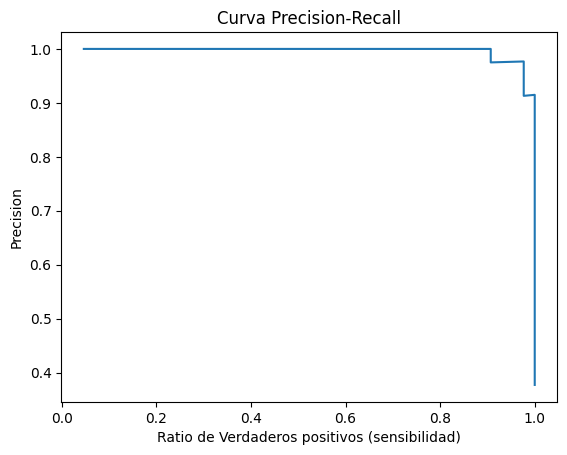

In [ ]:
plt.plot(sensibilidad_umbrales, precision_umbrales);
plt.ylabel("Precision")
plt.xlabel("Ratio de Verdaderos positivos (sensibilidad)")
plt.title("Curva Precision-Recall");

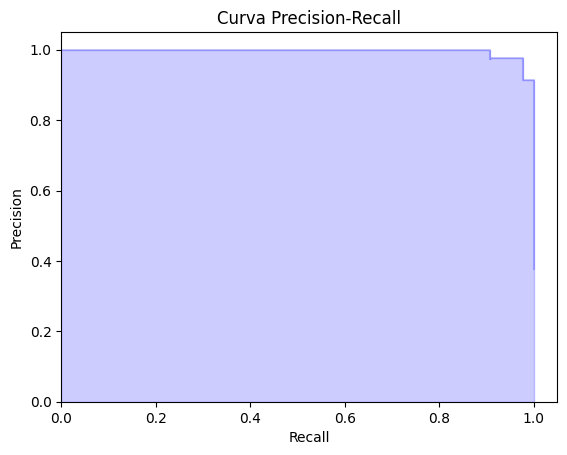

In [ ]:
def grafica_precision_recall(clases_reales, predicciones_probabilidades):
    precision_, recall_, _ = metrics.precision_recall_curve(
        clases_reales, predicciones_probabilidades[:,1])

    plt.step(recall_, precision_, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall_, precision_, step='post', alpha=0.2,
                 color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.05])
    plt.title('Curva Precision-Recall');
    plt.show()


grafica_precision_recall(real_class, predictions_prob)

**Area bajo la curva (Area Under the Curve, ROC-AUC)**

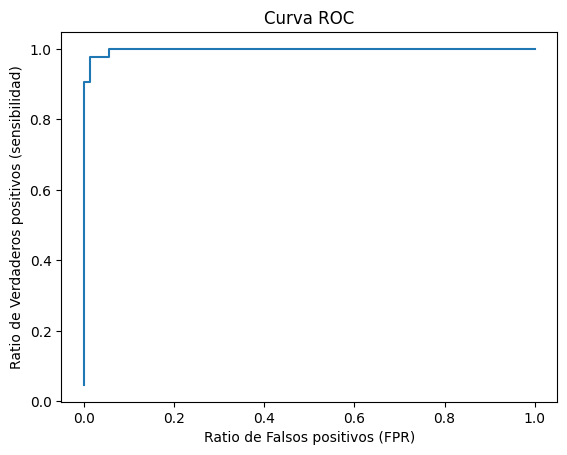

In [ ]:
plt.plot(fpr_umbrales, sensibilidad_umbrales);
plt.xlabel("Ratio de Falsos positivos (FPR)")
plt.ylabel("Ratio de Verdaderos positivos (sensibilidad)")
plt.title("Curva ROC");

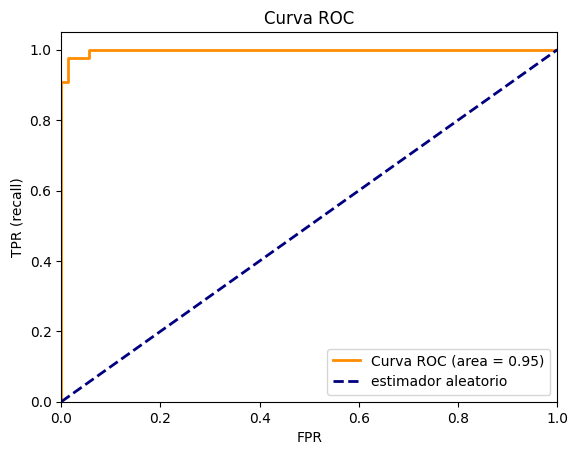

In [ ]:
def grafica_curva_auc(clases_reales, predicciones, predicciones_probabilidades):
    fpr, tpr, _ = metrics.roc_curve(clases_reales, predicciones_probabilidades[:,1])
    roc_auc = metrics.roc_auc_score(clases_reales, predicciones)
    plt.figure()

    plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="estimador aleatorio")

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR (recall)')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show();

grafica_curva_auc(real_class, predictions, predictions_prob)

In [ ]:
def evaluar_modelo(clases_reales, predicciones, probabilidades):
    exactitud = metrics.accuracy_score(clases_reales, predicciones)
    precision = metrics.average_precision_score(clases_reales, predicciones)
    sensibilidad = metrics.recall_score(clases_reales, predicciones)
    roc_auc = metrics.roc_auc_score(clases_reales, predicciones)
    f1 = metrics.f1_score(clases_reales, predicciones)
    print("""
    Exactitud: {:.3f}
    Precisión: {:.3f}
    Sensibilidad: {:.3f}
    Area bajo curva (AUC): {:.3f}
    Puntuación F1: {:.3f}
    """.format(
        exactitud,
        precision,
        sensibilidad,
        roc_auc,
        f1
    ))

evaluar_modelo(real_class, predictions, predictions_prob)


    Exactitud: 0.956
    Precisión: 0.919
    Sensibilidad: 0.907
    Area bajo curva (AUC): 0.946
    Puntuación F1: 0.940
    


In [ ]:
cancer_df.objetivo.value_counts(True)

,proportion
objetivo,
0,0.627417
1,0.372583


**Como decidir un Umbral de decision**

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

cancer_datos = datasets.load_breast_cancer()

cancer_df = pd.DataFrame(cancer_datos["data"],
                           columns=cancer_datos["feature_names"]
                          )

cancer_df["objetivo"] = cancer_datos.target
cancer_df["objetivo"] = cancer_df["objetivo"].replace({0:1, 1:0})

In [ ]:
X = cancer_df[cancer_datos.feature_names]
y = cancer_df["objetivo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
modelo = LogisticRegression(solver="liblinear")

modelo.fit(X_train, y_train)

predicciones = modelo.predict(X_test)
clases_reales = y_test
predicciones_probabilidades = modelo.predict_proba(X_test)

In [ ]:
probas = modelo.predict_proba(X_test)[:5]
probas

array([[8.16484616e-01, 1.83515384e-01],
       [4.42954029e-09, 9.99999996e-01],
       [2.49424507e-03, 9.97505755e-01],
       [9.96277971e-01, 3.72202937e-03],
       [9.99005213e-01, 9.94786972e-04]])

In [ ]:
umbral_decision = 0.5

probas[:,1]>=umbral_decision

array([False,  True,  True, False, False])

In [ ]:
umbral_decision = 0.1

probas[:,1]>=umbral_decision

array([ True,  True,  True, False, False])

In [ ]:
def softmax(coste_fp, coste_fn):
    return np.exp(coste_fn) / (np.exp(coste_fn)+np.exp(coste_fp))

coste_fn = 1
coste_fp = 2
softmax(coste_fp, coste_fn)

np.float64(0.2689414213699951)

In [ ]:
from ipywidgets import widgets, interact

@interact
def calculo_umbral(
    coste_fp=widgets.FloatSlider(min=1, max=10, step=0.1, value=1),
    coste_fn=widgets.FloatSlider(min=1, max=10, step=0.1, value=1),
):
    return softmax(coste_fp, coste_fn)

interactive(children=(FloatSlider(value=1.0, description='coste_fp', max=10.0, min=1.0), FloatSlider(value=1.0…

In [ ]:
coste_fn = 10
coste_fp = 1
umbral_decision = calculo_umbral(coste_fp, coste_fn)
print(umbral_decision)
decisiones = class_umbral(probas, umbral_decision)
decisiones

0.9998766054240137


array([0., 1., 0., 0., 0.])

In [ ]:
class BusinessLogisticRegression(LogisticRegression):

    def decision_de_negocio(self, X, coste_fp=1, coste_fn=1, *args, **kwargs):
        probs = self.predict_proba(X)
        umbral_decision = calculo_umbral(coste_fp, coste_fn)
        print("Umbral de decision: {}".format(umbral_decision))
        decisiones = class_umbral(probs, umbral_decision)
        return decisiones

modelo_negocio = BusinessLogisticRegression(solver="liblinear")

modelo_negocio.fit(X_train, y_train)

BusinessLogisticRegression(solver='liblinear')

In [ ]:
modelo_negocio.predict(X_test[:5])

array([0, 1, 1, 0, 0])

In [ ]:
modelo_negocio.predict_proba(X_test[:5])

array([[8.16484616e-01, 1.83515384e-01],
       [4.42954029e-09, 9.99999996e-01],
       [2.49424507e-03, 9.97505755e-01],
       [9.96277971e-01, 3.72202937e-03],
       [9.99005213e-01, 9.94786972e-04]])

In [ ]:
modelo_negocio.decision_de_negocio(X_test[:5], 1, 1)

Umbral de decision: 0.5


array([0., 1., 1., 0., 0.])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(clases_reales, predicciones)

array([[106,   2],
       [  4,  59]])

In [ ]:
@interact(
    coste_fp=widgets.FloatSlider(min=1.,max=10.,step=.1,value=1.),
    coste_fn=widgets.FloatSlider(min=1.,max=10.,step=.1,value=1.)
)
def decision_negocio(coste_fp, coste_fn):
    predicciones = modelo_negocio.decision_de_negocio(X_test, coste_fp, coste_fn)
    print(confusion_matrix(clases_reales, predicciones))

interactive(children=(FloatSlider(value=1.0, description='coste_fp', max=10.0, min=1.0), FloatSlider(value=1.0…